# _Data Anaysis of Titanic Dataset_
***

#### Primary Questions: 
* What sorts of people were likely to survive?
* What factors lead to survival?

## Data Acquisition Part:
***

In [154]:
# Loading the packages and setting up the directory to the data:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Directory where the data lies:
path = "C:/Users/Pratik Gandhi/Documents/Data Science Stuff/Projects/Titanic_Data_Data_Analysis" 

# Changing the directory to the path:
os.chdir(path)

In [155]:
# Loading the data for analysis:

titanic_df = pd.read_csv('titanic_data.csv')

## Data Wrangling/Munging:
***

In [32]:
# Looking at the size of the data:
titanic_df.shape

(891, 12)

In [27]:
# Looking at the data types:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

* The dataset on which we are working has 889 records and 12 columns.
* Looking at the datatypes of different columns it seems that many of them have been encoded as integer and float (numeric type) while the other few of them have been "object" type.

In [33]:
# Looking at first few rows:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#VARIABLE DESCRIPTIONS:
#survival        Survival (0 = No; 1 = Yes)
#pclass          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#name            Name
#sex             Sex
#age             Age
#sibsp           Number of Siblings/Spouses Aboard
#parch           Number of Parents/Children Aboard
#ticket          Ticket Number
#fare            Passenger Fare
#cabin           Cabin
#embarked        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

#SPECIAL NOTES:
#Pclass is a proxy for socio-economic status (SES)
 #1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

#Age is in Years; Fractional if Age less than One (1)
 #If the Age is Estimated, it is in the form xx.5

#With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used 
#for sibsp and parch.

#Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
#Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
#Parent:   Mother or Father of Passenger Aboard Titanic
#Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

#Other family relatives excluded from this study include cousins,
#nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
#only with a nanny, therefore parch=0 for them.  As well, some
#travelled with very close friends or neighbors in a village, however,
#the definitions do not support such relations.

In [37]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [36]:
titanic_df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [6]:
# Getting summary/statistics of each column:

titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* On looking the statistical summary of the data, it seems that non-numeric columns of the data have been dropped out.
* Only about 38% of people have survived, because the mean of 'Survived' is 0.38 which counts those survive = '1' otherwise = '0'.
* Looking at the Pclass, we can observe that more than 50% of people belonged to class = 3.
* Age column has some missing values --> 891 - 714 = 177.
* Looking at the fare, the minimum is 0 which indicates the possibility of free tickets or data error. Also the maximum value being 512.33 indicates that there might be some outliers.

In [47]:
# Getting summary of non-numeric/categorical columns:
cat_var = titanic_df.dtypes[titanic_df.dtypes == 'object'].index

titanic_df[cat_var].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Fox, Mr. Stanley Hubert",male,1601,G6,S
freq,1,577,7,4,644


* The summary statistics of the categorical variables show the total number of each variable, unique number of records, most frequent occuring value and the frequency of the most occuring value.
* Also, there are lot of missing information for cabin number.

### Transformation of Some Variables/Change of Data types:

* **Pclass** variable is taken as Integer type where '1' shows passenger from first class, '2' shows passenger from second class and '3' shows passenger from third class. It makes more sense to rather consider them as Discrete/Categorical variable with 3 levels rather than Continuous variable.

In [65]:
con_pclass = pd.Categorical(titanic_df['Pclass']) # Converting them to categorical variable

cat_pclass = con_pclass.rename_categories(["Class1","Class2","Class3"]) # There are 3-classes.

cat_pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [67]:
# Replacing it in our main dataframe:
titanic_df['Pclass'] = cat_pclass

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Class3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


* Similarly, for **Survived** column, variable is taken as Integer type where '1' is for who survived and '0' is for who didn't survive. It makes more sense to rather consider them as Discrete/Categorical variable with 2 levels rather than Continuous variable.

In [64]:
con_survived = pd.Categorical(titanic_df['Survived'])

cat_survived = con_survived.rename_categories(["Died","Survived"])

cat_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


* However, changing them to text(Died,Survived) instead of numbers(0,1) wouldn't really help in our analysis. Therefore, we would not change the type of our variable

* Looking at the **Cabin** variable, it feels the need to change them to string type rather than just keeping them object. Also categorize them would help a lot in further analysis:

In [70]:
char_cabin = titanic_df['Cabin'].astype(str)   # Conversion to string type

cat_cabin = np.array([cabin[0] for cabin in char_cabin])

cat_cabin = pd.Categorical(cat_cabin)

cat_cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


* Interestingly, we get all the categories with an additional one called **_'n'_** which stands for **'NaN'**. Almost 65-70% people's cabin information is missing or not listed. This might be a predictor for the people who died.

In [76]:
# Replacing it in our main dataframe:
titanic_df['Cabin'] = cat_cabin

# Looking at the few changes we did:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Class3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S
1,2,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,Class3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S
3,4,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,Class3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S
5,6,0,Class3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,n,Q
6,7,0,Class1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
7,8,0,Class3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,n,S
8,9,1,Class3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,n,S
9,10,1,Class2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,n,C


## Dealing with _"missing values"_ / "NAs" / _"outliers"_:

* It is quite often observed in datasets that there are always some missing values, NAs or potential outliers.
* These strange values need to be treated in a manner that it does not create biasness in our predictions resulting in failure of model.
* There are couple of below mentioned things that is usually done to handle them:
 1. Those values can be turned to 0.
 2. Remove them entirely.
 3. They can be substituted by central values like mean/median.
 4. Prepare different model by separating the observations with such values

### As we came across before, **_age_** in this dataset is one of those categories which has some missing values. Lets investigate more in depth:

In [78]:
titanic_df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [83]:
missing_age_val = np.where(titanic_df["Age"].isnull() == True)
missing_age_val # Index where there are missing values

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

In [85]:
len(missing_age_val[0])

177

* Removing the values from variable like _"Age"_ would not be in the best of interest. These are a lot of values. These values can be really important in our model.
* Let's try substituting by some mean/median values of the data.
* Plotting the current values on histogram would give a better understanding if using these central value would be reasonable or not.

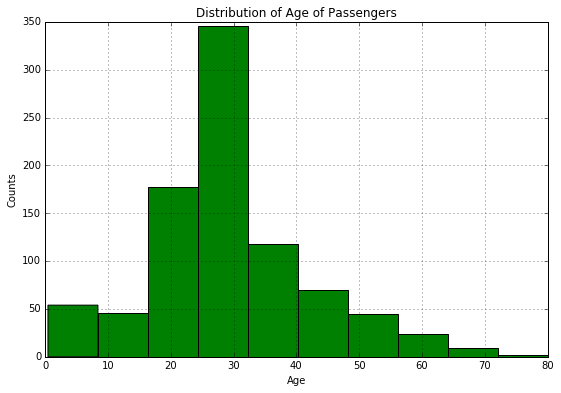

In [97]:
titanic_df.hist(column='Age', facecolor = 'green' , figsize=(9,6))
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title ('Distribution of Age of Passengers')

From figure, we can definitely think of using the central value (28 - median) instead of missing values as major chunk of our dataset lies in the range of 20-30 years.

In [94]:
new_var_age = np.where(titanic_df["Age"].isnull(), 28, titanic_df["Age"])

titanic_df["Age"] = new_var_age # Substituting back into our dataframe

titanic_df["Age"].describe() # Looking at the summary.

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Also, looking at the above plot created it can be seen that there are passengers which were as high as 80. But looking at the graph it looks reasonable of the ship having 2 or 3 of them. We would not consider them as outliers.

In [217]:
missing_cabin_val = np.where(titanic_df["Cabin"].isnull() == True)
len(missing_cabin_val[0]) #### How to calculate the null values??????????????????????????????????????????

687

In [215]:
# Looking at first few values:
titanic_df["Cabin"][0:15]

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

* **_Cabin_** has a lot of missing values as well. As we calculated before there are more than 2/3 values which are NaNs. 
* Also cabin values may not be a really good predictor in our final model. 

***

## Exploration Phase:
#### Looking into each variables separately:

**1. PassengerID** doesn't really provide any information that would help in Data Analysis and modeling. We should ignore/remove.

In [ ]:
# Removing the PassengerID column:
del titanic_df['PassengerId']

**2.Survived** is our outcome measure! Lets explore it in detail: 

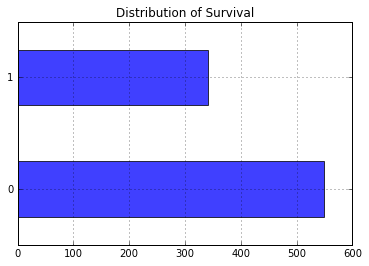

In [121]:
titanic_df.Survived.value_counts().plot(kind='barh', alpha = 0.75)
plt.title("Distribution of Survival") 
plt.grid(b=True)

**3. Passengers Class**

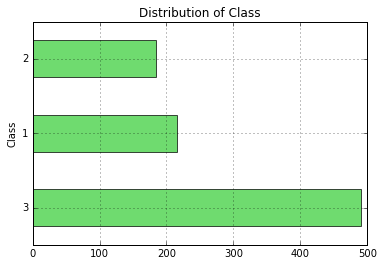

In [226]:
titanic_df.Pclass.value_counts().plot(kind='barh' , alpha = 0.7, facecolor = '#32CD32')
plt.title("Distribution of Class")
plt.ylabel("Class")
plt.grid(b=True)

**4. Age**

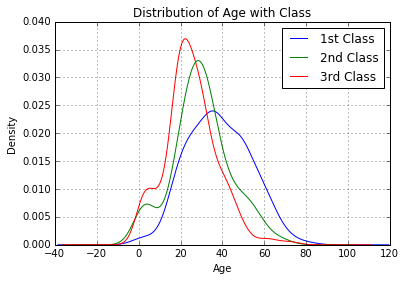

In [224]:
titanic_df.Age[titanic_df.Pclass == 1].plot(kind='kde')
titanic_df.Age[titanic_df.Pclass == 2].plot(kind='kde')
titanic_df.Age[titanic_df.Pclass == 3].plot(kind='kde')
plt.title("Distribution of Age with Class")
plt.xlabel("Age")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 
plt.grid(b=True)

**5. Sex**

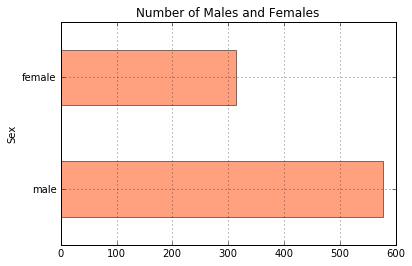

In [227]:
titanic_df.Sex.value_counts().plot(kind='barh', alpha = 0.5, facecolor = '#FF4500')
plt.title("Number of Males and Females")
plt.ylabel("Sex")
plt.grid(b=True)

** 6.Ticket **

In [228]:
titanic_df["Ticket"][0:15]

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

In [230]:
titanic_df["Ticket"].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

* Ticket has 681 unique values. 
* Also, there is not a unique pattern in tickets alike cabin number. We could have group them together if they were to follow a logical pattern.
* It is better we get rid of it.

In [ ]:
del titanic_df["Ticket"]

** 7. Boarding of Passengers by location **

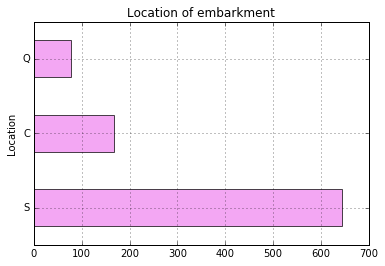

In [232]:
titanic_df.Embarked.value_counts().plot(kind='barh', alpha = 0.7, facecolor = '#EE82EE')
plt.title("Location of embarkment")
plt.ylabel("Location")
plt.grid(b=True)

Lets get in more depth and see how this distribution looks for males and females

(-1, 2)

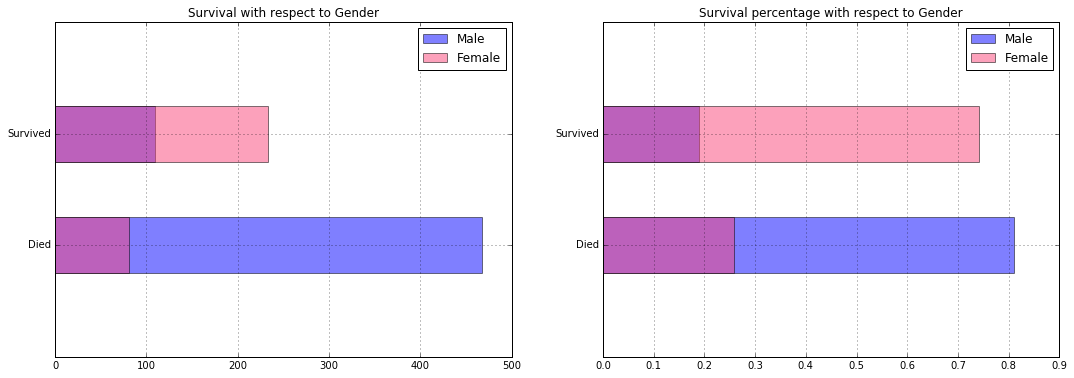

In [207]:
fig = plt.figure(figsize=(18,6))

# Total number of male survived and died
male_survive = titanic_df.Survived[titanic_df.Sex == 'male'].value_counts().sort_index() 

# Total number of female survived and died
female_survive = titanic_df.Survived[titanic_df.Sex == 'female'].value_counts().sort_index() 

# Plotting them together:
ax1 = fig.add_subplot(121)
male_survive.plot(kind = 'barh', label='Male', alpha = 0.5) # Male Plot
female_survive.plot(kind = 'barh', color='#FA4579', label='Female', alpha = 0.5) # Female Plot
plt.title("Survival with respect to Gender")
plt.legend(loc='best') # Setting the legend
plt.grid(b=True) # Keeping the grid on
ax1.set_yticklabels([ "Died", "Survived"])
ax1.set_ylim(-1, 2) 

# Plotting the percentage of total male and female
ax2 = fig.add_subplot(122)
(male_survive/male_survive.sum()).plot(kind = 'barh', label='Male', alpha = 0.5) # Male Plot
(female_survive/female_survive.sum()).plot(kind = 'barh', color='#FA4579', label='Female', alpha = 0.5) # Female Plot
plt.title("Survival percentage with respect to Gender")
plt.legend(loc='best') # Setting the legend 
plt.grid(b=True) # Keeping the grid on
ax2.set_yticklabels(["Died", "Survived"])
ax2.set_ylim(-1, 2) 

From these plots it can be concluded that more men died and survived compared to women. **However, the percentage of survival was higher is women than men!**. Diving in more deeper it would be really interesting to see how the class of passengers would affect the survival rate.

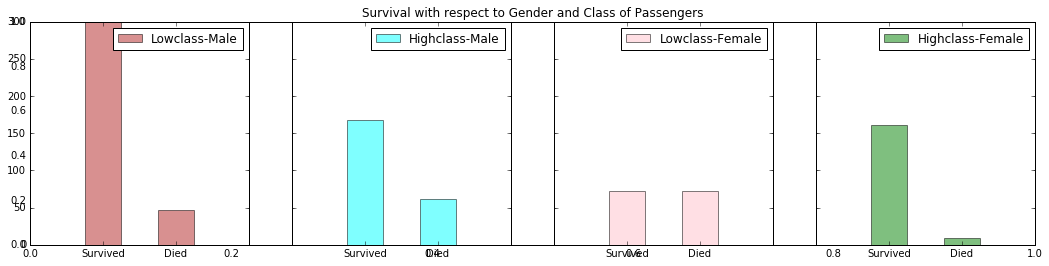

In [205]:
# Total number of male and female survived and died of class 3 (lower class):
male_survive_low_class = titanic_df.Survived[titanic_df.Sex == 'male'][titanic_df.Pclass == 3].value_counts()
female_survive_low_class = titanic_df.Survived[titanic_df.Sex == 'female'][titanic_df.Pclass == 3].value_counts()

# Total number of male and female survived and died of class 1 and 2 (Higher class):
male_survive_high_class = titanic_df.Survived[titanic_df.Sex == 'male'][titanic_df.Pclass != 3].value_counts()
female_survive_high_class = titanic_df.Survived[titanic_df.Sex == 'female'][titanic_df.Pclass != 3].value_counts()

fig = plt.figure(figsize=(18,4), dpi=1600)
plt.title("Survival with respect to Gender and Class of Passengers")

ax1 = fig.add_subplot(141)
male_survive_low_class.plot(kind = 'bar', color='#B22222', label='Lowclass-Male', alpha = 0.5)
ax1.set_xticklabels(["Survived", "Died"], rotation=0) # Renaming X-axis
ax1.set_xlim(-1, len(male_survive_low_class)) 
plt.legend(loc='best') # Setting the legend

ax2 = fig.add_subplot(142, sharey=ax1)
male_survive_high_class.plot(kind = 'bar', color='#00FFFF', label='Highclass-Male', alpha = 0.5)
ax2.set_xticklabels(["Survived", "Died"], rotation=0) # Renaming X-axis
ax2.set_xlim(-1, len(male_survive_high_class))
plt.legend(loc='best') # Setting the legend

ax3 = fig.add_subplot(143, sharey=ax1)
female_survive_low_class.plot(kind = 'bar', color='Pink', label='Lowclass-Female', alpha = 0.5)
ax3.set_xticklabels(["Survived", "Died"], rotation=0) # Renaming X-axis
ax3.set_xlim(-1, len(female_survive_low_class)) 
plt.legend(loc='best') # Setting the legend

ax4 = fig.add_subplot(144, sharey=ax1)
female_survive_high_class.plot(kind = 'bar', color='Green', label='Highclass-Female', alpha = 0.5)
ax4.set_xticklabels(["Survived", "Died"], rotation=0) # Renaming X-axis
ax4.set_xlim(-1, len(female_survive_high_class))
plt.legend(loc='best') # Setting the legend

From the above figures we can conclude that people of higher class (1 and 2) have higher survival rate as compared to those of lower class (3).